# Visualização de dados para tomada de decisão

![](https://media.giphy.com/media/zw69pUViBZCZW/giphy.gif)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

In [2]:
df = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', encoding="ISO-8859-1")

/home/barbarabarbosa/Envs/ds36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Quais são as áreas de graduação dos cientistas de dados?

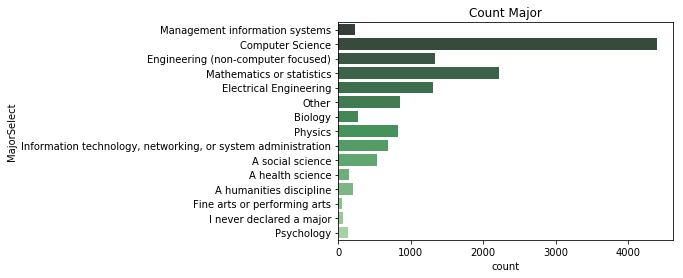

In [7]:
#Countplot com MajorSelect
_ = sns.countplot(y='MajorSelect', data=df, palette="Greens_d").set_title("Count Major")

Para ficar mais facil de ver podemos ordenar as barras

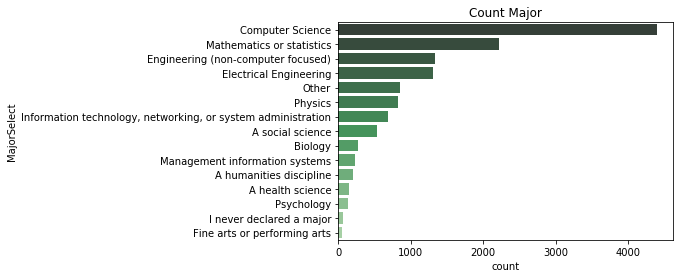

In [14]:
# ordene o eixo y
_ = sns.countplot(y='MajorSelect', data=df, palette="Greens_d", order=df['MajorSelect'].value_counts().index) \
.set_title("Count Major")

Agora ficou bem mais fácil de tirar conclusões sobre os cursos.

A maioria dos cientistas de dados estudou ciência da computação, matemática ou engenharia.

E se trocarmos os y por um x?

### Qual o maior grau de educação dos cientistas de dados?

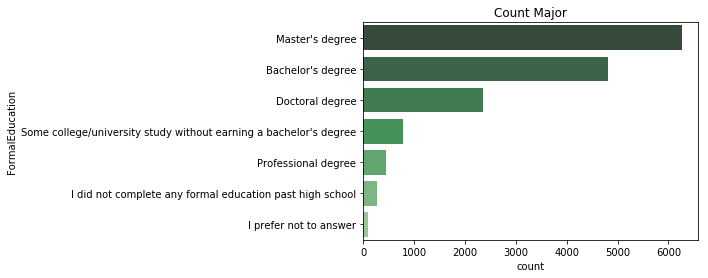

In [15]:
# Use o campo FormalEducation
_ = sns.countplot(y = 'FormalEducation', data=df, palette="Greens_d", 
                  order=df['FormalEducation'].value_counts().index).set_title("Count Major")

### Desafio 2
##### Quais os empregos anteriores dos cientistas de dados?

Para fazer esse desafio você vai consultar a coluna `PastJobTitlesSelect`. Veja que essa coluna possui varios valores. Você precisará criar um método para reduzir a granularidade dessa coluna.

Dica: A solução fica mais fácil se você usar [expressões regulares](https://pt.wikipedia.org/wiki/Express%C3%A3o_regular). Para testá-las use [esse site](https://regexr.com/)

![finn_mathematical](https://media.giphy.com/media/ccQ8MSKkjHE2c/giphy.gif)

In [22]:
df['PastJobTitlesSelect'].value_counts()

I haven't started working yet                                                                                                                                                         1454
Other                                                                                                                                                                                 1043
Researcher                                                                                                                                                                             786
Software Developer/Software Engineer                                                                                                                                                   784
Engineer                                                                                                                                                                               497
Programmer,Software Developer/Software Engineer                  

In [20]:
# Resolva o desafio aqui
print(df['PastJobTitlesSelect'][0])
print(re.sub(r'(?=,).*', '', df['PastJobTitlesSelect'][0]))

Predictive Modeler,Programmer,Researcher
Predictive Modeler


In [24]:
df['PastJobTitlesSelect'] = df['PastJobTitlesSelect'].fillna('NULL')

In [ ]:
past_job_category = []
for s in df['PastJobTitlesSelect']:
    past_job_category.append(re.sub(r'(?=,).*', '', s))
    
df['PastJobTitles'] = past_job_category

In [30]:
df['PastJobTitles'] = df['PastJobTitlesSelect'].apply(lambda x: re.sub(r'(?=,).*', '', x))

In [31]:
df[['PastJobTitles', 'PastJobTitlesSelect']].head(5)

,PastJobTitles,PastJobTitlesSelect
0,Predictive Modeler,"Predictive Modeler,Programmer,Researcher"
1,Software Developer/Software Engineer,Software Developer/Software Engineer
2,Data Scientist,"Data Scientist,Machine Learning Engineer"
3,Business Analyst,"Business Analyst,Operations Research Practitio..."
4,Computer Scientist,"Computer Scientist,Data Analyst,Data Miner,Dat..."


In [32]:
df['PastJobTitles'].value_counts()

NULL                                    2524
Business Analyst                        2338
Data Analyst                            1806
I haven't started working yet           1454
Engineer                                1302
Computer Scientist                      1232
Researcher                              1125
Other                                   1083
Programmer                              1002
Data Scientist                           935
Software Developer/Software Engineer     861
DBA/Database Engineer                    326
Data Miner                               212
Machine Learning Engineer                202
Statistician                             146
Predictive Modeler                        85
Operations Research Practitioner          83
Name: PastJobTitles, dtype: int64

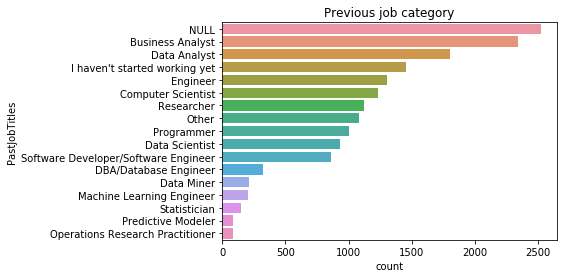

In [33]:
_ = sns.countplot(y = "PastJobTitles", 
                  data=df, 
                  order=df["PastJobTitles"].value_counts().index).set_title("Previous job category")